In [1]:
import numpy as np
import pandas as pd
import comonotonic as cm
import os
from sklearn.model_selection import train_test_split
import copy
import utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Note that we assume the last column is the label
# If the first column is ID's, remove it
filename = "cancer.csv"
random_state = 42
df = pd.read_csv("Datasets/"+filename)
df = df.iloc[:,:32]
labels = df['diagnosis']
df = df.drop(['id','diagnosis'], axis=1)
df['diagnosis'] = labels
colnames = [('X'+str(i)) for i in range(df.shape[1]-1)]
colnames.append('Y')
df.columns = colnames
df = utils.encode_df(df, [30])
cont_col = [i for i in range(30)]
unrankable_fv = None
num_categories_list = [3,4,5,6,7,8,9,10]

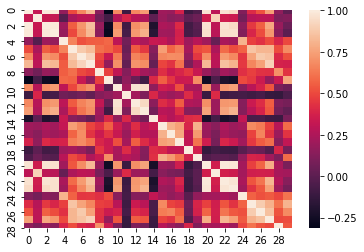

In [3]:
# Data Exploration
X = df.iloc[:,0:-1].to_numpy()
corr_x = np.corrcoef(X.T)
ax = sns.heatmap(corr_x)
# we see that cells in light colors exist apart from the diagonal, exist dependent features

In [4]:
# Naive Bayes
NB_X = df.iloc[:,0:-1].to_numpy()
NB_Y = df.iloc[:,-1].to_numpy()
NB_X_train, NB_X_test, NB_Y_train, NB_Y_test = train_test_split(NB_X, NB_Y, test_size = 0.2, random_state = random_state)

nb_classifier = cm.naive_bayes(NB_X_train, NB_Y_train, cont_col)
nb_classifier.run()
nb_y_predict = nb_classifier.predict(NB_X_test)
utils.get_accuracy(nb_y_predict, NB_Y_test)

0.9649122807017544

In [5]:
# pure comonotonicity
# Here encounters the combinatorial optimization problem
# suppose cont_col has size m, num_categories_list has size n, then there are n^m combinations
# need to use some combinatorial optimization method to find the optimal combination
df1 = df.copy()
accuracy_history1, allocation_history1 = utils.determine_allocation(cont_col, num_categories_list,
                                                               df1, unrankable, colnames, max_itr = 100,
                                                               temp = 2, anneal_schedule = 5, use_cluster = False,
                                                               use_mistaken_accuracy_test = True, random_state = random_state)
plt.plot(list(accuracy_history1.values()))

NameError: name 'unrankable' is not defined

In [9]:
# clustered comonotonic
df2 = df.copy()
accuracy_history_clu, allocation_history_clu = utils.determine_allocation(cont_col, num_categories_list, df2, unrankable_fv,
                                                                         colnames, max_itr = 50, temp = 1, anneal_schedule = 5,
                                                                         use_cluster = True, use_mistaken_accuracy_test = False, 
                                                                         random_state = random_state, min_corr = 0.7, qcut = False)
plt.plot(list(accuracy_history_clu.values()))

KeyError: nan

In [8]:
df.isnull().values.any()

False